# Assignment 1

## 1. Theory

#### 1.

###### a)

In [5]:
import numpy as np

In [15]:
X = np.array([[-2], [-5], [-3], [0], [-8], [-2], [1], [5], [-1], [6]])
X = np.c_[np.ones(len(X)),X].astype(int)
X = np.array(X)
Y = np.array([[1], [-4], [1], [3], [11], [5], [0], [-1], [3], [1]])
print(X)
print(Y)

[[ 1  1  1  1  1  1  1  1  1  1]
 [-2 -5 -3  0 -8 -2  1  5 -1  6]]
[[ 1]
 [-4]
 [ 1]
 [ 3]
 [11]
 [ 5]
 [ 0]
 [-1]
 [ 3]
 [ 1]]


In [19]:
np.linalg.inv(X.T @ X) @ X.T @ Y

array([[ 1.62523306],
       [-0.41640771]])

##### b)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression().fit(X, Y)
print(reg.coef_)
print(reg.intercept_)

[[ 0.         -0.41640771]]
[1.62523306]


#### 2.

##### a)

In [22]:
from sympy import symbols, diff

In [25]:
x1, x2 = symbols('x1 x2', real=True)
f = (x1 + x2 -2)**2
diff(f,x1)

2*x1 + 2*x2 - 4

##### b)

In [2]:
import matplotlib as plt

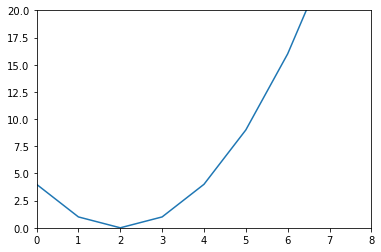

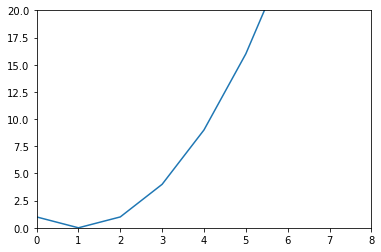

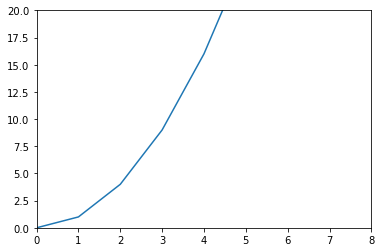

In [34]:
def graph(formula):
    x1 = np.array(range(0, 20))
    J = eval(formula)
    plt.plot(x1,J)
    plt.ylim(0, 20)
    plt.xlim(0,8)
    plt.show()
    
# x2 = 0
#J = (x1 - 2)**2
graph('(x1 - 2)**2')

# x2 = 1
#J = (x1 - 1)**2
graph('(x1 - 1)**2')

# x2 = 2
#J = (x1)**2
graph('(x1)**2')

##### c)

In [ ]:
x1 + x2 - 2 = 0
x1 + x2 = 2
# This condition has to be true, so any value that satisfies
# this condition would minimise J

## 2. Closed Form Linear Regression

In [4]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn import linear_model
from sklearn.preprocessing import scale
import numpy as np
import seaborn as sb

In [5]:
#1
df = pd.read_csv('x06Simple.csv')
del df['Index']

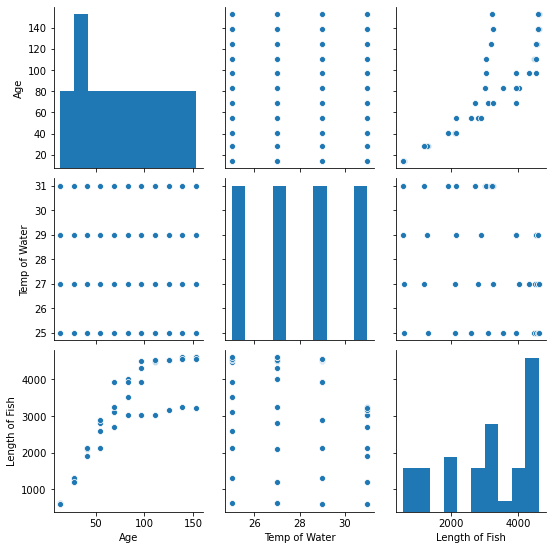

In [6]:
sb.pairplot(df)

In [7]:
#2
df = df.sample(frac=1)

In [31]:
#3
splt = np.random.rand(len(df)) < 0.67
train_df = df[splt]
test_df = df[~splt]

print(train_df)
print()
print(test_df)

    Age  Temp of Water  Length of Fish
7   111             25            4465
13   41             27            2110
35   41             31            1915
37   69             31            2710
40  111             31            3040
15   69             27            3255
5    83             25            3535
36   55             31            2140
12   28             27            1215
24   41             29            2140
1    28             25            1315
42  139             31            3257
16   83             27            4015
39   97             31            3030
3    55             25            2600
18  111             27            4495
2    41             25            2120
14   55             27            2805
29  111             29            4520
25   55             29            2890
41  125             31            3180
9   139             25            4570
21  153             27            4600
23   28             29            1305
17   97             27   

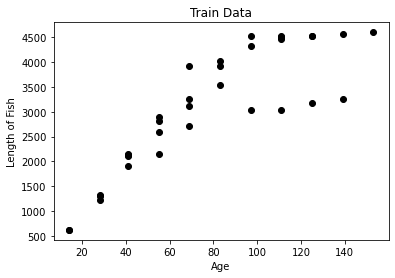

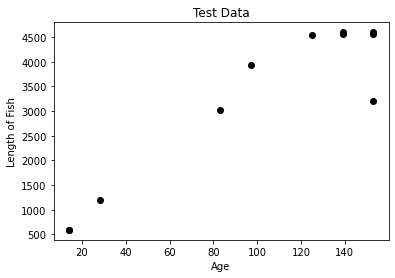

In [51]:
#4
from sklearn import preprocessing
std = preprocessing.scale(train_df)

X_train = train_df['Age']
X_test = test_df['Age']
Y_train = train_df['Length of Fish']
Y_test = test_df['Length of Fish']


plt.scatter(X_train, Y_train, color='black')
plt.title('Train Data')
plt.xlabel('Age')
plt.ylabel('Length of Fish')
# plt.xticks(())
# plt.yticks(())
plt.show()

plt.scatter(X_test, Y_test, color='black')
plt.title('Test Data')
plt.xlabel('Age')
plt.ylabel('Length of Fish')
# plt.xticks(())
# plt.yticks(())
plt.show()

In [49]:
X = np.c_[np.ones(len(X_train)),X_train].astype(int)
X = np.array(X)
Y = np.array(Y_train)

thetas = np.linalg.inv(X.T @ X) @ X.T @ Y
thetas

array([958.88488214,  27.19117833])

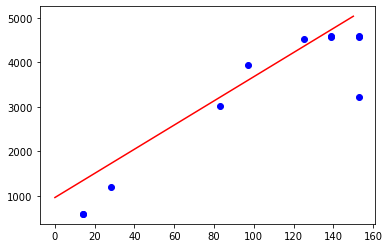

In [60]:
def y_compute(x):
    return (thetas[1]*x) + thetas[0]
x1 = 0
x2 = 150
y1 = y_compute(x1)
y2 = y_compute(x2)

plt.plot(X_test, Y_test, 'bo')
plt.plot([x1,x2] ,[y1,y2], color='red')
plt.show()

In [68]:
error_squared_sum = 0
for index, row in test_df[['Age', 'Length of Fish']].iterrows():
    x = row['Age']
    y_act = row['Length of Fish']
    y_pred = y_compute(x)
    error_squared = (y_act - y_pred)**2
    error_squared_sum += error_squared
#     print(x, y_act, y_pred)
    
mean_error_squared_sum = error_squared_sum / test_df.shape[0]
root_mean_error_squared_sum = mean_error_squared_sum**(0.5)
root_mean_error_squared_sum

14 590 1339.561378806844
125 4535 4357.782173773767
14 590 1339.561378806844
153 3214 5119.135167098757
139 4600 4738.458670436261
83 3020 3215.7526837862824
153 4600 5119.135167098757
139 4565 4738.458670436261
153 4566 5119.135167098757
28 1205 1720.2378754693389
97 3935 3596.429180448777


727.8716553945101

3